# 1. Distance Modulus

#### (a) Use Eq. 3 to numerically compute the standard cosmology curve (solid black line) in Fig. 1a. (use common approximation with zhel → zcmb in the “1 + z” prefactor).

Distance Modulus:

$
\mu = 5 \log_{10} \left( \frac{D_L}{10 \text{ pc}} \right)
$

Luminoscity Distance: 

$
D_L = \frac{c}{H_0} (1 + z) \int_0^{z} \frac{dz'}{E(z')}
$

$
E(z) = \left[ \Omega_{\text{DE}}(1 + z)^{3(1+w)} + \Omega_M (1 + z)^3 \right]^{1/2}
$

Assumptions:

- $\Omega_K = 0$

Givens: 

- $H_0 = 70$ km/s/Mpc
- $c = 2.998 \times 10^5$ km/s is the speed of light
- $w = -1$ 
    - ccosmological constant (informs that energy density remians constant over time)

Looked Up On My Own:

- $\Omega_M = 0.3$ (matter density - current)
- $\Omega_{\text{DE}} = 0.7$ (dark energy density - current) 

Inferred from Figure 1 Plot a: 

- $z_\text{CMB}$ ranging from 0 to 2




/var/folders/71/hv72gkrs7g59ty6664549kjr0000gr/T/ipykernel_17506/1356318961.py:31: RuntimeWarning: divide by zero encountered in log10
  return 5 * np.log10(DL_pc / 10)


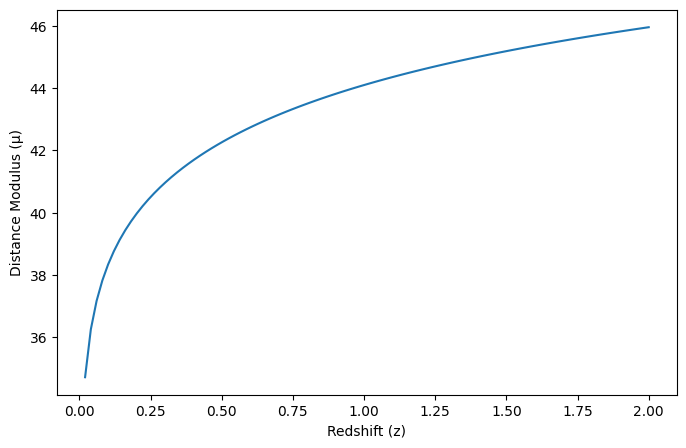

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
c = 2.998e5 # km/s
H0 = 70  # km/s/Mpc
Omega_M = 0.3
Omega_DE = 0.7
w = -1 

## USING SCIPY QUAD FUNCTION TO INTEGRATE ##

# Step 1: Define the function to integrate

def integrand(z):
    return 1 / np.sqrt(Omega_DE * (1 + z) ** (3 * (1 + w)) + Omega_M * (1 + z) ** 3)

# Step 2: Compute luminosity distance
# NOTE: return value in Mpc

def luminosity_distance(z):
    integral, error_est = quad(integrand, 0, z)
    return (c / H0) * (1 + z) * integral  # in Mpc

# Step 3: compute distance modulus
# Note the conversion factor 1e6 to convert Mpc to parsecs

def distance_modulus(z):
    DL_pc = luminosity_distance(z) * 1e6  # Convert to parsecs
    return 5 * np.log10(DL_pc / 10)

# Step 4: Define Limits of Integration 
z_values = np.linspace(0, 2, 100)

# Step 5: Command to compute integral 
mu = np.array([distance_modulus(z) for z in z_values])

## PLOTTING ##

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(z_values, mu, label=r'$\Omega_M=0.3, \Omega_\Lambda=0.7, w=-1$')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.show()


#### (b) For the zhel → zcmb approximation, show that the maximum μ-error is 0.0025 mag at low-z.